In [2]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
!head Input-test1.water1.xyz.water1.xyz.GraphGeod

2 91 0 0 0 2 1 1.744 164.35 -7.132027
2 216 0 0 0 1 2 1.789 162.21 -7.464739
3 45 0 0 0 3 1 1.601 167.57 -7.224381
3 48 0 0 0 1 3 2.355 150.31 -0.814043
3 101 0 0 0 2 1 1.597 156.73 -5.264938
3 186 0 0 0 1 3 1.643 174.02 -7.386344
4 85 0 0 0 2 1 1.608 174.29 -7.458882
4 206 0 0 0 1 2 1.670 164.78 -7.234470
5 26 0 0 0 1 2 1.643 174.01 -7.578933
5 154 0 0 0 3 1 1.852 161.75 -4.118536


# Water network ## 

In [4]:
num_mol_1 = 216    ## total number of nodes ## 
num_mol_2 = 0

init_AM = np.zeros((num_mol_1 + num_mol_2,num_mol_1 + num_mol_2))     ## create empty adjacency matrix ## 
with open('Input-test1.water1.xyz.water1.xyz.GraphGeod') as init_graph_file:     ## load graph file generated from ChemNetworks ##
# loop through CN output file and find edges, put into AM
    for line in init_graph_file:
        mol_1 = int(line.split()[0])
        mol_2 = int(line.split()[1])
        if mol_1 >= num_mol_1 and mol_2 >= num_mol_1:
            pass
        else:
            init_AM[mol_1 - 1][mol_2 - 1] = 1    ## add edge information to the 
            init_AM[mol_2 - 1][mol_1 - 1] = 1
# convert adjacency matrix to networkx formation
init_NX_AM = nx.from_numpy_matrix(init_AM)
G = init_NX_AM
#G = nx.number_connected_components(G)
#G = nx.from_numpy_matrix(init_NX_AM)#, create_using=nx.MultiGraph)
init_AM[1][25]


0.0

In [5]:
print(init_AM)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


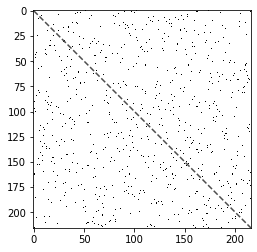

In [6]:
matrix = nx.to_numpy_matrix(G)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
ax.plot([0, 250], [0, 250], ls="--", c=".3")
plt.imshow(-matrix, interpolation='nearest', cmap=plt.cm.gray)
plt.savefig('adjacency_matrix.png',dpi=1000)
plt.show()

In [7]:
np.savetxt('test_AM.csv',init_AM)

### A quick plot to see graph ##

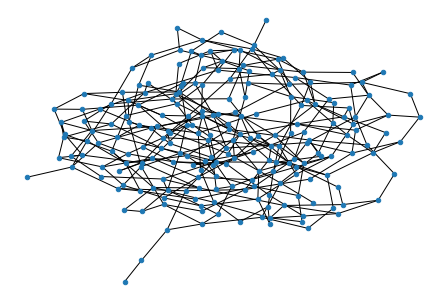

In [9]:
nx.draw(G, node_size=20)

In [43]:
#G = init_NX_AM #atlas6() #init_NX_AM

print("graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
print(nx.number_connected_components(G), "connected components")
#remove = [node for node,degree in dict(G.degree()).items() if degree < 5]
#G.remove_nodes_from(remove)

graph has 216 nodes with 356 edges
1 connected components


## connected components ## 

In [44]:
cc= nx.connected_components(G)
print(cc)
print ([len(s) for s in cc])
print(cc)

<generator object connected_components at 0x1367748d0>
[216]
<generator object connected_components at 0x1367748d0>


In [45]:
ccall = nx.clustering(G)
clustering_coefficient = nx.average_clustering(G)
print (ccall)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

Text(0.5, 1.0, 'clustering coefficients')

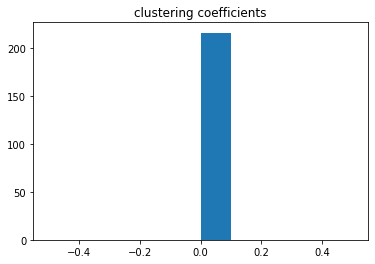

In [46]:
h,bins,patches = plt.hist(list(nx.clustering(G).values()))
plt.title('clustering coefficients')

## Unique Structures Identification ## 

In [59]:
nodes = [1, 2, 3, 4]
edges = [
    # [],
    # [(3, 4)],
    # [(1, 2), (2, 3)],
    # [(1, 2), (3, 4)],
    [(1, 2), (1, 3), (1, 4)],
    [(1, 2), (2, 3), (3, 4)],
    [(1, 2), (1, 3), (3, 2), (4, 1), (4, 3)],
    [(1, 2), (2, 3), (3, 1), (1, 4)],
    [(1, 2), (2, 3), (3, 4), (4, 1)],
    # [(1, 2), (2, 3), (3, 1)],
    [(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (4, 2)],
]

[0.1734231420045456, 0.1734231420045456, 0.1734231420045456, 0.4797305739863632]


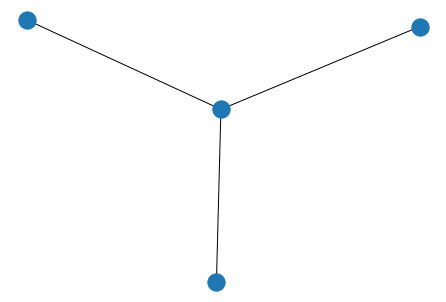

[0.17543839772251535, 0.17543839772251535, 0.32456160227748465, 0.32456160227748465]


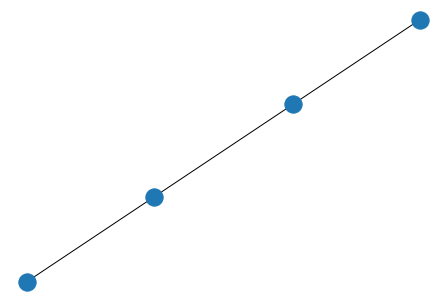

[0.20478693540661067, 0.20478693540661067, 0.29521306459338925, 0.29521306459338925]


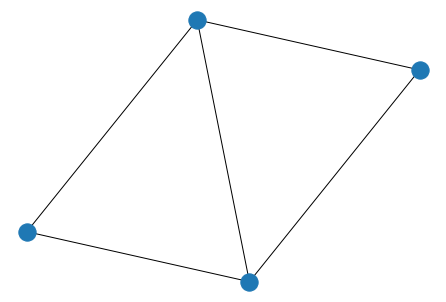

[0.14140875554444032, 0.2459279727012903, 0.2459279727012903, 0.36673529905297914]


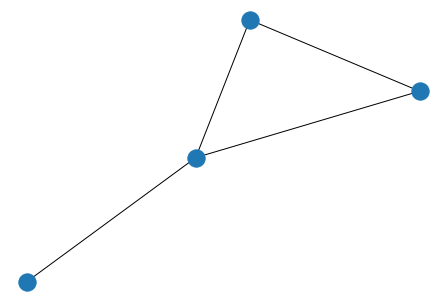

[0.25, 0.25, 0.25, 0.25]


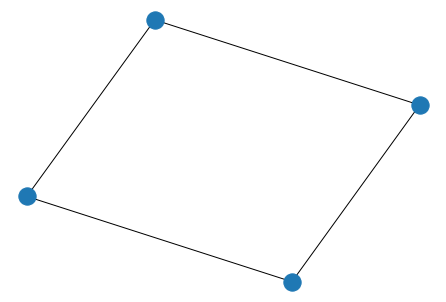

[0.25, 0.25, 0.25, 0.25]


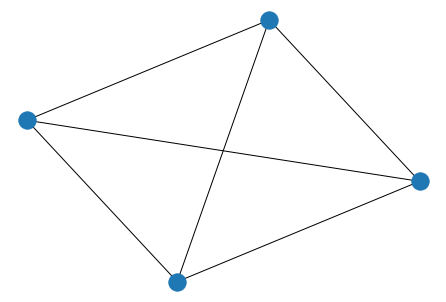

In [60]:
for edge in edges:
    H = nx.Graph()
    # H.add_nodes_from(nodes)
    H.add_edges_from(edge)
    print(sorted(nx.pagerank(H).values()))
    nx.draw(H)
    plt.show()

## plotting the water graph based on centrality ##

In [47]:
c=nx.clustering(G)
pos = nx.spring_layout(G, iterations=100)
cent = nx.degree_centrality(G)
pos = nx.spring_layout(nx.degree_centrality(G), iterations=100)
node_size = [v * 10000 for v in cent.values()]

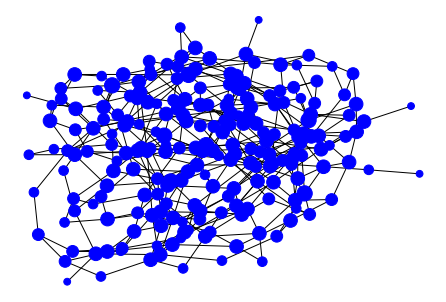

In [48]:
nx.draw(G, node_color='b', nodelist=cent.keys(), node_size=node_size, with_labels=False)

## Degree-Centrality distribution ## 
### The degree centrality for a node v is the fraction of nodes it is connected to.

In [49]:
degree_centrality = nx.degree_centrality(G)

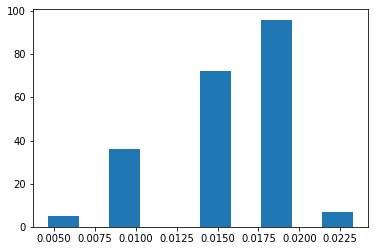

In [50]:
#degree centrality 
deg_cent =list(degree_centrality.values())
deg_cent = np.array(deg_cent)
h1,bins1,patches1 = plt.hist(deg_cent)
plt.show()

## Shortest Paths
### Distribution of shortest path length between all nodes in a network

In [63]:
H = nx.path_graph(4)

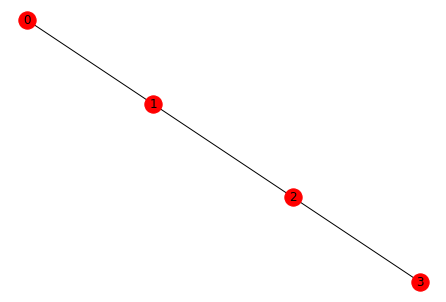

In [64]:
nx.draw(H, with_labels=True, node_color="red")

In [67]:
length = list(nx.all_pairs_shortest_path_length(H))
bag = list()
for i in length:
    bag.extend(list(i[1].values()))
print(bag)        

[0, 1, 2, 3, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 3]


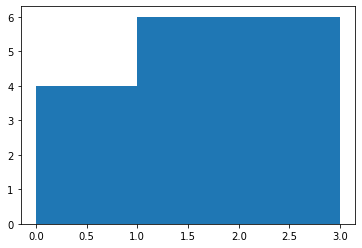

In [66]:
plt.hist(bag, bins=max(bag))
plt.show()

In [ ]:
## paths within water network ##

In [68]:
length = list(nx.all_pairs_shortest_path_length(G))
bag = list()
for i in length:
    bag.extend(list(i[1].values()))
print(bag)        

[0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 0, 1, 2, 2, 2, 2, 2, 2, 3, 4, 5, 6, 6, 6, 6, 0, 1, 2, 2, 2, 2, 2, 2, 3, 4, 5, 6, 6, 6, 6, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 

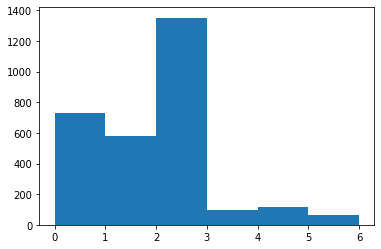

In [69]:
plt.hist(bag, bins=max(bag))
plt.show()

## Graph Energy (New Descriptor) ## 
### New Descriptor (I havent seen this in any chemistry paper)
### Graph Energy = Sum of the eigenvalues of the adjacency matrix
### Descriptor of the overall graph connectivity (higher value of E(G) represents high connectivity. It is dependent on the total number of nodes within the graph)

### https://www.hindawi.com/journals/jchem/2019/7214047/

In [51]:
from scipy.sparse.csgraph import connected_components
eig = nx.adjacency_spectrum(G)
#print(eig)

/Users/user1/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/Users/user1/miniconda3/lib/python3.7/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


(array([20., 25., 23., 22., 24., 23., 27., 24., 19.,  9.]),
 array([-3.23299271+0.j, -2.55032528+0.j, -1.86765784+0.j, -1.18499041+0.j,
        -0.50232298+0.j,  0.18034445+0.j,  0.86301189+0.j,  1.54567932+0.j,
         2.22834675+0.j,  2.91101418+0.j,  3.59368161+0.j]),
 <BarContainer object of 10 artists>)

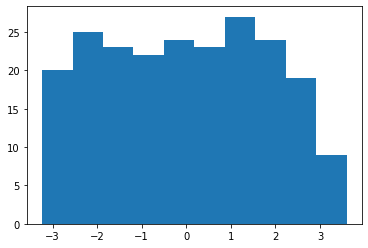

In [52]:
plt.hist(eig)

In [53]:
graph_energy = np.sum(np.abs(eig))
print(graph_energy)

338.4853228101979


## Graph Energy as a function of nodes ## 

In [55]:
H1 = G.subgraph(np.arange(0,10))
H2 = G.subgraph(np.arange(0,50))
H3 = G.subgraph(np.arange(0,100))
H4 = G.subgraph(np.arange(0,150))
H5 = G.subgraph(np.arange(0,200))
H6 = G.subgraph(np.arange(0,250))

eig1 = nx.adjacency_spectrum(H1)
GE1 = np.sum(np.abs(eig1))

eig2 = nx.adjacency_spectrum(H2)
GE2 = np.sum(np.abs(eig2))

eig3 = nx.adjacency_spectrum(H3)
GE3 = np.sum(np.abs(eig3))

eig4 = nx.adjacency_spectrum(H4)
GE4 = np.sum(np.abs(eig4))

eig5 = nx.adjacency_spectrum(H5)
GE5 = np.sum(np.abs(eig5))

eig6 = nx.adjacency_spectrum(H6)
GE6 = np.sum(np.abs(eig6))

nodes_G = [10,50,100,150,200,250]
GE_with_nodes = [GE1,GE2,GE3,GE4,GE5,GE6]

Text(0, 0.5, 'Graph Energy E(G(n))')

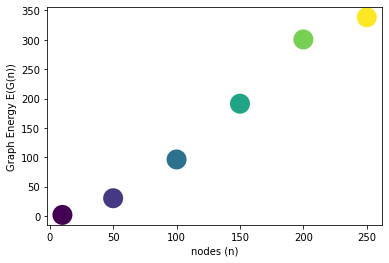

In [78]:
plt.scatter(nodes_G,GE_with_nodes, c=nodes_G, ec='k',s=400,lw=0)
#plt.plot(nodes_G,GE_with_nodes,'o-')
plt.xlabel('nodes (n)')
plt.ylabel('Graph Energy E(G(n))')

## degree distribution ## Edges per node in Graph ## 

In [27]:
degree_sequence = sorted((d for n, d in G.degree() ), reverse=True)
dmax = max(degree_sequence)

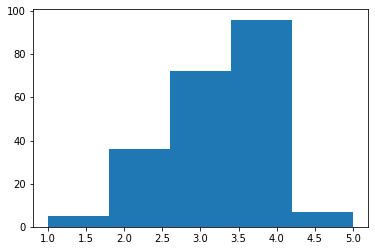

In [28]:
h,bins,patches = plt.hist(degree_sequence,bins=dmax)

## ion-solvent Graph ## 

In [23]:
num_mol_1 = 600    ## total number of nodes ## 
num_mol_2 = 130

init_AM = np.zeros((num_mol_1 + num_mol_2,num_mol_1 + num_mol_2))     ## create adjacency matrix ## 
with open('ion_water.GraphGeod') as init_graph_file:     ## load graph file generated from ChemNetworks ##
# loop through CN output file and find edges, put into AM
    for line in init_graph_file:
        mol_1 = int(line.split()[0])
        mol_2 = int(line.split()[1])
        if mol_1 >= num_mol_1 and mol_2 >= num_mol_1:
            pass
        else:
            init_AM[mol_1 - 1][mol_2 - 1] = 1
            init_AM[mol_2 - 1][mol_1 - 1] = 1
# convert adjacency matrix to networkx formation
init_NX_AM = nx.from_numpy_matrix(init_AM)
G = init_NX_AM
#G = nx.number_connected_components(G)
#G = nx.from_numpy_matrix(init_NX_AM)#, create_using=nx.MultiGraph)
init_AM[1][24]



0.0

In [24]:
print("graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
print(nx.number_connected_components(G), "connected components")

graph has 730 nodes with 290 edges
452 connected components


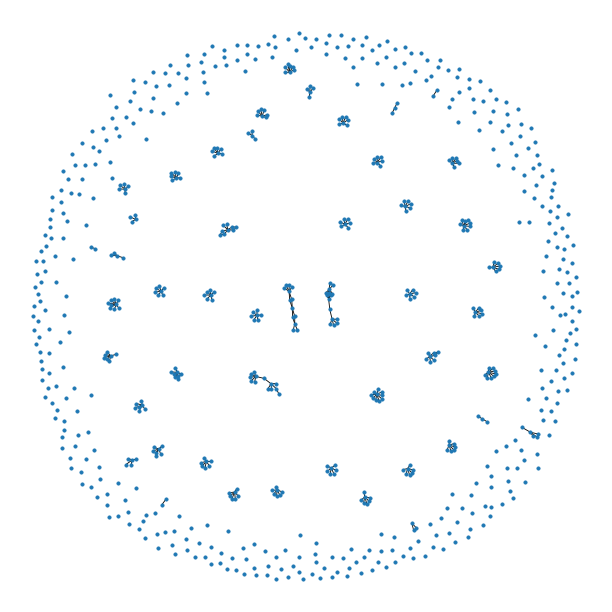

In [58]:
plt.figure(figsize=(10, 10), dpi=60)
nx.draw(G, node_size=15)

In [12]:
cc= nx.connected_components(G)
#print (type(cc))
#print ([len(s) for s in cc])
cc_size = [len(s) for s in cc]
print(cc_size)

[7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 15, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 13, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 8, 7, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 8, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 

Text(0, 0.5, 'Probability')

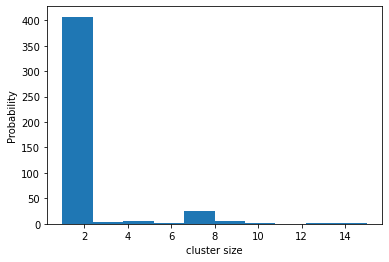

In [13]:
h,bins,patches = plt.hist(np.array(cc_size))
plt.xlabel('cluster size')
plt.ylabel('Probability')

Text(0, 0.5, 'log(P)')

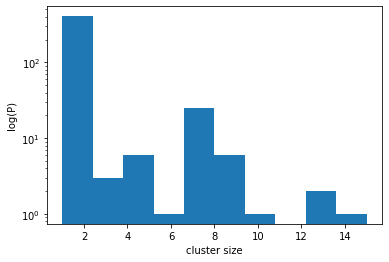

In [14]:
h,bins,patches = plt.hist(np.array(cc_size))
plt.yscale('log')
plt.xlabel('cluster size')
plt.ylabel('log(P)')

In [15]:
c=nx.clustering(G)
pos = nx.spring_layout(G, iterations=100)
cent = nx.degree_centrality(G)
pos = nx.spring_layout(nx.degree_centrality(G), iterations=100)
node_size = [v * 10 for v in cent.values()]

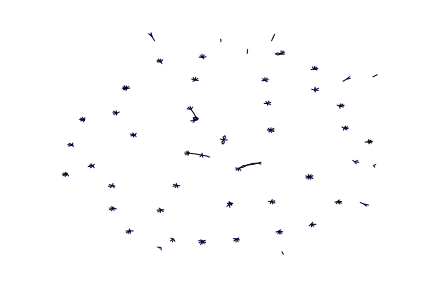

In [16]:
nx.draw(G, node_color='b', nodelist=cent.keys(), node_size=node_size, with_labels=False)

/Users/user1/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/Users/user1/miniconda3/lib/python3.7/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


(array([  8.,  31.,  10.,   9., 614.,   0.,   9.,  10.,  31.,   8.]),
 array([-3.40496531e+00+0.j, -2.72397225e+00+0.j, -2.04297919e+00+0.j,
        -1.36198613e+00+0.j, -6.80993063e-01+0.j,  1.77635684e-15+0.j,
         6.80993063e-01+0.j,  1.36198613e+00+0.j,  2.04297919e+00+0.j,
         2.72397225e+00+0.j,  3.40496531e+00+0.j]),
 <BarContainer object of 10 artists>)

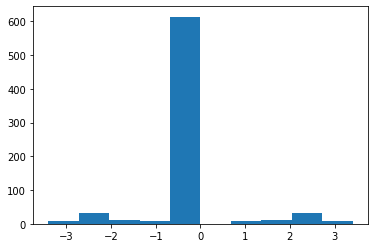

In [17]:
from scipy.sparse.csgraph import connected_components
eig = nx.adjacency_spectrum(G)
plt.hist(eig)

In [37]:
graph_energy = np.sum(np.abs(eig))
print(graph_energy)

249.04809660733324


## Tutorial Ends Here ## 

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

Text(0.5, 1.0, 'Triangles')

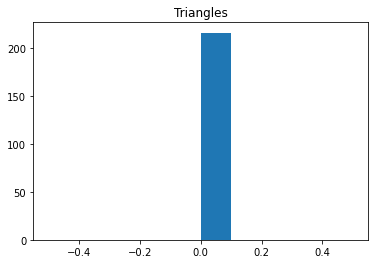

In [109]:
print(nx.triangles(G))
#print(nx.triangles(er))
h,bins, patches = plt.hist(list(nx.triangles(G).values()))
plt.title('Triangles')

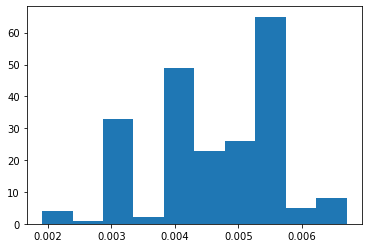

In [107]:
#prank = []
pr = nx.pagerank(G)
prank=list(pr.values())
#print(prank)
#prank.append(float(pr.values()))
#print(prank)
#histogram of PR 
prank = np.array(prank)
h,bins,patches = plt.hist(prank)#,bins=dmax)

In [108]:
cc=nx.average_clustering(G) 
cc

0.0

In [10]:
c=nx.clustering(G)

In [11]:
pos = nx.spring_layout(G, iterations=100)

In [14]:
cent = nx.degree_centrality(G)
pos = nx.spring_layout(nx.degree_centrality(G), iterations=100)
node_size = [v * 10000 for v in cent.values()]

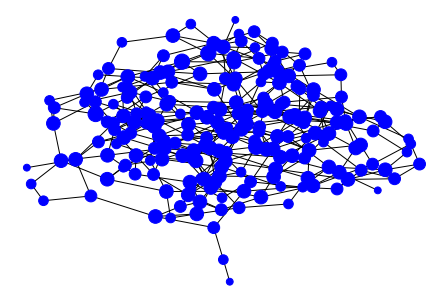

In [15]:
nx.draw(G, node_color='b', nodelist=cent.keys(), node_size=node_size, with_labels=False)

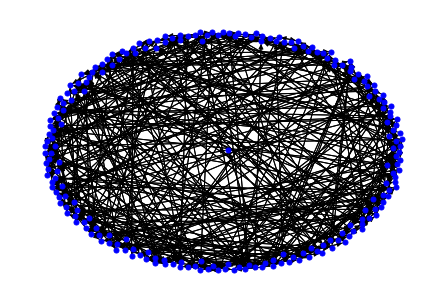

In [48]:
H = G.to_directed()
nx.draw(H, pos, node_color='b', node_size=25, with_labels=False)

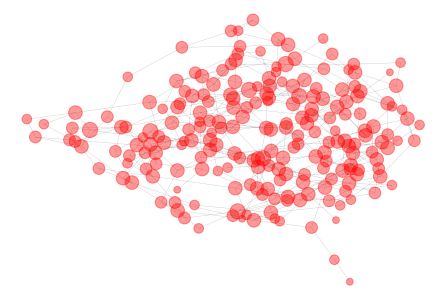

In [46]:
nx.draw(G, alpha=0.4, node_color='r', width=0.2, nodelist=cent.keys(), node_size=node_size)

In [6]:
pathlengths = []
# This prints the source node and the dictionary of shortest lengths to various nodes
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v)
    print('%s %s' % (v, spl))
    for p in spl.values():
        pathlengths.append(p)

0 {0: 0, 296: 1, 52: 2, 166: 2}
1 {1: 0}
2 {2: 0}
3 {3: 0}
4 {4: 0, 706: 1}
5 {5: 0}
6 {6: 0}
7 {7: 0}
8 {8: 0}
9 {9: 0}
10 {10: 0, 732: 1, 64: 2}
11 {11: 0}
12 {12: 0}
13 {13: 0, 795: 1, 164: 2, 203: 2}
14 {14: 0}
15 {15: 0}
16 {16: 0}
17 {17: 0}
18 {18: 0}
19 {19: 0, 398: 1}
20 {20: 0, 676: 1}
21 {21: 0, 299: 1}
22 {22: 0}
23 {23: 0}
24 {24: 0}
25 {25: 0, 733: 1}
26 {26: 0, 883: 1, 130: 2}
27 {27: 0, 372: 1, 107: 2, 151: 2}
28 {28: 0}
29 {29: 0, 855: 1, 89: 2, 169: 2}
30 {30: 0}
31 {31: 0}
32 {32: 0, 390: 1}
33 {33: 0, 724: 1}
34 {34: 0, 877: 1, 235: 2}
35 {35: 0}
36 {36: 0, 513: 1, 161: 2, 214: 2}
37 {37: 0}
38 {38: 0, 871: 1}
39 {39: 0}
40 {40: 0}
41 {41: 0}
42 {42: 0}
43 {43: 0}
44 {44: 0}
45 {45: 0}
46 {46: 0}
47 {47: 0}
48 {48: 0}
49 {49: 0}
50 {50: 0, 692: 1}
51 {51: 0, 351: 1, 94: 2}
52 {52: 0, 296: 1, 0: 2, 166: 2}
53 {53: 0, 863: 1}
54 {54: 0}
55 {55: 0}
56 {56: 0}
57 {57: 0}
58 {58: 0}
59 {59: 0}
60 {60: 0, 737: 1}
61 {61: 0}
62 {62: 0}
63 {63: 0}
64 {64: 0, 732: 1, 10: 2}


In [7]:
print("average shortest path length %s" % (sum(pathlengths)/len(pathlengths)))

average shortest path length 0.25905797101449274


In [8]:
# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p]+=1
    else:
        dist[p]=1
print("length #paths")
verts = dist.keys()
d1 = []
dist1 = []
for d in sorted(verts):
    print('%s %d' % (d,dist[d]))
    d1.append(d)
    dist1.append(dist[d])
    

length #paths
0 888
1 146
2 70


Text(0, 0.5, 'avg. count')

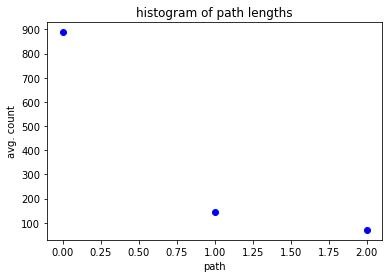

In [9]:
#hmax=max(h)
#plt.axis([1,dmax,1,hmax]) # set ranges
x=d1
y=dist1
plt.plot(x,y,'bo')
plt.title("histogram of path lengths")
plt.xlabel("path")
plt.ylabel("avg. count")

In [10]:
import community

In [11]:
partition = community.best_partition(G)

In [12]:
list_of_communities=[]
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    list_of_communities.append(list_nodes)

In [13]:
count

815.0

In [14]:

sample_array = np.array(init_NX_AM)

In [19]:
k = 10

In [20]:
len(list_of_communities[k])

3

In [21]:
G_sample = G 
degree_centrality = nx.degree_centrality(G_sample)
closeness_centralirty = nx.closeness_centrality(G_sample)
betweenness_centrality = nx.betweenness_centrality(G_sample)

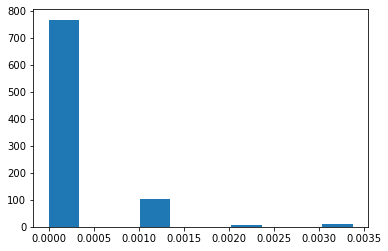

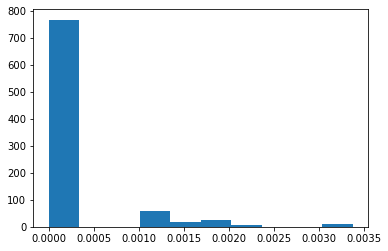

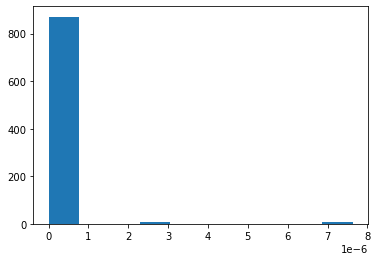

In [22]:
# histograms of degree closeness and betweenness centrality distributions 

#degree centrality 
deg_cent =list(degree_centrality.values())
deg_cent = np.array(deg_cent)
h1,bins1,patches1 = plt.hist(deg_cent)
plt.show()

#closeness centrality 

close_cent =list(closeness_centralirty.values())
close_cent = np.array(close_cent)
h2,bins2,patches2 = plt.hist(close_cent)
plt.show()

#betweenness centrality 

bw_cent =list(betweenness_centrality.values())
bw_cent = np.array(bw_cent)
h3,bins3,patches3 = plt.hist(bw_cent)
plt.show()

In [42]:
centrality = {}
for key in degree_centrality.keys() : 
    centrality[key]= 1/2*degree_centrality[key] + 1/4*closeness_centralirty[key] + 1/4*betweenness_centrality[key]

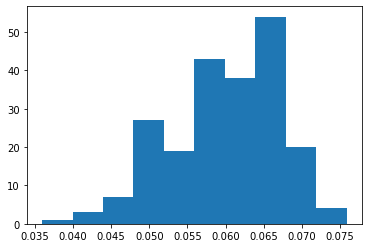

In [43]:
#total centrality 
avg_cent =list(centrality.values())
avg_cent = np.array(avg_cent)
h4,bins4,patches4 = plt.hist(avg_cent)
plt.show()

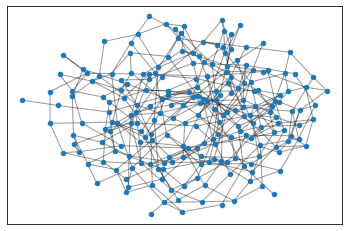

216


In [15]:
#n >= 600
#degree_sequence = sorted((d for n, d in G.degree() if n > 600 ), reverse=True)
degree_sequence = sorted((d for n, d in G.degree() ), reverse=True)
dmax = max(degree_sequence)
Gcc = sorted((G.subgraph(c) for c in nx.connected_components(G)), key = len, reverse=True)[0]
pos = nx.spring_layout(Gcc)
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()
print(len(degree_sequence))

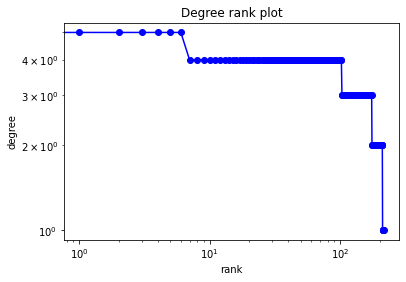

In [16]:
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.axes([0.45,0.45,0.45,0.45])
plt.axis('off')
plt.show()

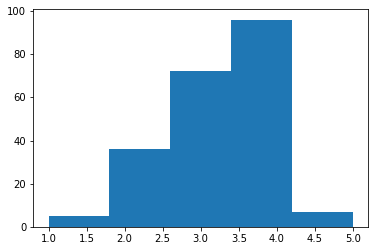

In [17]:
h,bins,patches = plt.hist(degree_sequence,bins=dmax)

[0.02314815 0.18981481 0.52314815 1.        ]
[1 2 3 4 5]


ValueError: x and y should have the same shape

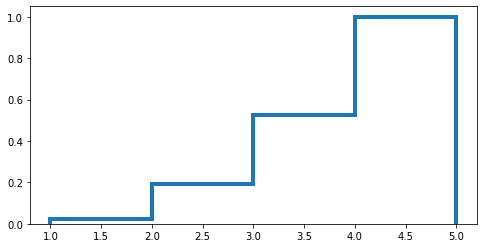

In [25]:
# plot the cumulative histogram
import matplotlib.pyplot as plt
from astropy import modeling
fig, ax = plt.subplots(figsize=(8, 4))
mu = 100
sigma = 25
n, bins, patches = ax.hist(degree_sequence, density=True, histtype='step',
                           cumulative=True, label='Empirical',linewidth=4.0,align='mid',bins=np.arange(min(degree_sequence),max(degree_sequence)+1,1))

#fitting to a Gaussian 
print((n))
print(bins)
bins = bins[:]
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
fitted_model = fitter(model, bins, n)
print(model)
# Add a line showing the expected distribution.
#y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     #np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
#y = y.cumsum()
#y /= y[-1]

ax.plot(bins, fitted_model(bins), 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(degree_sequence, bins=bins, density=True, histtype='step', cumulative=-1,
        label='Reversed emp.',linewidth=4.0,align='mid')

# tidy up the figure
ax.grid(True)
plt.xlim(1,5,1)
ax.legend(loc='center left')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Degree k')
ax.set_ylabel('P(k)')
plt.savefig('cumulative_dist_function.pdf',ppi=1200)
plt.show()


In [ ]:
#plotting using ggplot 



In [22]:
print(h)

[ 5. 36. 72. 96.  7.]


In [23]:
print(bins)

[1 2 3 4 5]


Text(0, 0.5, 'number of nodes')

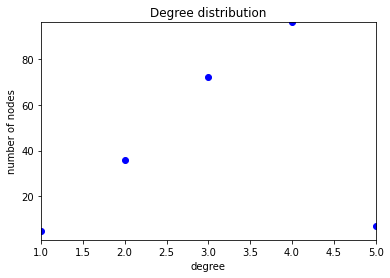

In [24]:
hmax=max(h)
plt.axis([1,dmax,1,hmax]) # set ranges
x=bins.compress(h)
y=h.compress(h)
plt.plot(x,y,'bo')
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("number of nodes")

Text(0.5, 1.0, 'clustering coefficients')

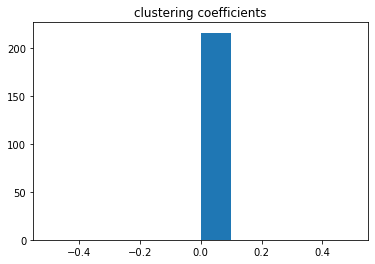

In [143]:
h,bins,patches = plt.hist(list(nx.clustering(G).values()))
plt.title('clustering coefficients')

In [144]:
init_clusters = []
init_clusters_gen = nx.connected_components(init_NX_AM)
for element in init_clusters_gen:
    init_clusters = init_clusters + [list(element)]
print (len(init_clusters))    

1


In [145]:
for i in init_clusters:
    print(len(i))

216


In [146]:
for i in range(len(init_AM)) : 
    print((init_AM[1][i]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0


In [149]:
centrality = nx.eigenvector_centrality(G)

In [150]:
print(['%s %0.2f'%(node,centrality[node]) for node in centrality])

['0 0.06', '1 0.13', '2 0.03', '3 0.03', '4 0.03', '5 0.06', '6 0.05', '7 0.06', '8 0.02', '9 0.04', '10 0.11', '11 0.03', '12 0.11', '13 0.04', '14 0.06', '15 0.08', '16 0.06', '17 0.08', '18 0.04', '19 0.11', '20 0.08', '21 0.03', '22 0.06', '23 0.05', '24 0.02', '25 0.05', '26 0.03', '27 0.04', '28 0.10', '29 0.00', '30 0.11', '31 0.11', '32 0.05', '33 0.06', '34 0.10', '35 0.08', '36 0.10', '37 0.02', '38 0.06', '39 0.10', '40 0.05', '41 0.02', '42 0.03', '43 0.09', '44 0.03', '45 0.07', '46 0.04', '47 0.04', '48 0.03', '49 0.04', '50 0.09', '51 0.04', '52 0.06', '53 0.04', '54 0.04', '55 0.02', '56 0.04', '57 0.03', '58 0.08', '59 0.06', '60 0.08', '61 0.05', '62 0.11', '63 0.09', '64 0.06', '65 0.01', '66 0.04', '67 0.02', '68 0.05', '69 0.16', '70 0.09', '71 0.06', '72 0.06', '73 0.03', '74 0.03', '75 0.10', '76 0.04', '77 0.03', '78 0.09', '79 0.05', '80 0.03', '81 0.08', '82 0.02', '83 0.04', '84 0.04', '85 0.07', '86 0.04', '87 0.01', '88 0.05', '89 0.13', '90 0.10', '91 0.05

Largest eigenvalue: 1.914778160502754
Smallest eigenvalue: 2.7478019859472624e-15


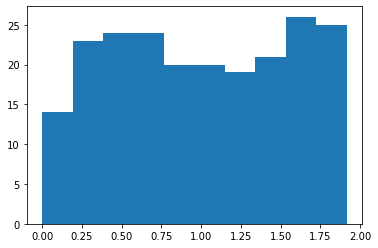

In [154]:
L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=10)  # histogram with 100 bins
#plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()

{(0, 52): Text(0.5290724258940381, 0.4991540886957158, '1.0'),
 (0, 102): Text(0.007596135534251314, 0.08682413985828387, '1.0'),
 (0, 173): Text(0.6572722787101594, -0.4746213562995547, '1.0'),
 (1, 90): Text(0.06677576930379242, 0.26454238781748457, '1.0'),
 (1, 97): Text(0.0251671377535837, 0.17181469701753835, '1.0'),
 (1, 162): Text(0.4997884687553463, -0.4854576408914052, '1.0'),
 (1, 215): Text(0.9995769251799516, 9.717960807592574e-09, '1.0'),
 (2, 44): Text(0.6425557429249589, 0.5080671698220475, '1.0'),
 (2, 47): Text(0.6002628575043067, 0.5187427193136246, '1.0'),
 (2, 100): Text(0.012631655126824515, 0.14438031819515423, '1.0'),
 (2, 185): Text(0.8092719010719469, -0.36313535738453273, '1.0'),
 (3, 42): Text(0.6691074365641511, 0.5134241745163286, '1.0'),
 (3, 84): Text(0.11507514142957381, 0.364971684164598, '1.0'),
 (3, 205): Text(0.972718655050804, -0.11369454617373591, '1.0'),
 (4, 25): Text(0.8701317003682896, 0.39044439217389737, '1.0'),
 (4, 153): Text(0.367209672798

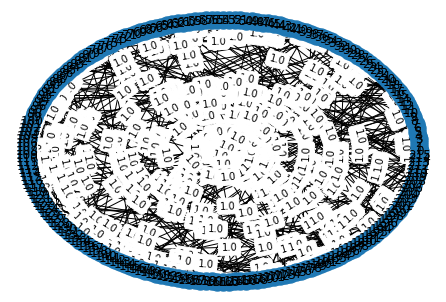

In [159]:
pos = nx.circular_layout(G)

node_labels = {}
for u in G.nodes():
    node_labels[u] = u
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, labels = node_labels)
edge_labels = {(n1,n2): G[n1][n2]['weight'] for (n1,n2) in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

In [160]:
nx.get_edge_attributes(G, 'weight')

{(0, 52): 1.0,
 (0, 102): 1.0,
 (0, 173): 1.0,
 (1, 90): 1.0,
 (1, 97): 1.0,
 (1, 162): 1.0,
 (1, 215): 1.0,
 (2, 44): 1.0,
 (2, 47): 1.0,
 (2, 100): 1.0,
 (2, 185): 1.0,
 (3, 42): 1.0,
 (3, 84): 1.0,
 (3, 205): 1.0,
 (4, 25): 1.0,
 (4, 153): 1.0,
 (5, 8): 1.0,
 (5, 57): 1.0,
 (5, 79): 1.0,
 (5, 147): 1.0,
 (6, 81): 1.0,
 (6, 119): 1.0,
 (6, 153): 1.0,
 (7, 114): 1.0,
 (7, 130): 1.0,
 (7, 141): 1.0,
 (8, 55): 1.0,
 (9, 135): 1.0,
 (9, 144): 1.0,
 (9, 149): 1.0,
 (10, 116): 1.0,
 (10, 124): 1.0,
 (10, 160): 1.0,
 (10, 177): 1.0,
 (11, 118): 1.0,
 (11, 132): 1.0,
 (11, 204): 1.0,
 (12, 39): 1.0,
 (12, 43): 1.0,
 (12, 89): 1.0,
 (12, 210): 1.0,
 (13, 44): 1.0,
 (13, 80): 1.0,
 (13, 135): 1.0,
 (13, 137): 1.0,
 (14, 20): 1.0,
 (14, 91): 1.0,
 (14, 98): 1.0,
 (14, 112): 1.0,
 (15, 85): 1.0,
 (15, 93): 1.0,
 (15, 170): 1.0,
 (15, 187): 1.0,
 (16, 35): 1.0,
 (16, 66): 1.0,
 (16, 137): 1.0,
 (16, 204): 1.0,
 (17, 30): 1.0,
 (17, 35): 1.0,
 (17, 94): 1.0,
 (18, 91): 1.0,
 (18, 150): 1.0,
 (18, 

Text(0.5, 1.0, 'clustering coefficients')

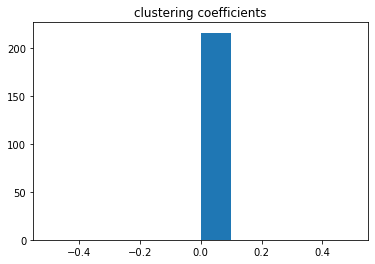

In [162]:
h,bins,patches = plt.hist(list(nx.clustering(G).values()))
plt.title('clustering coefficients')

0


Text(0.5, 1.0, 'Triangles')

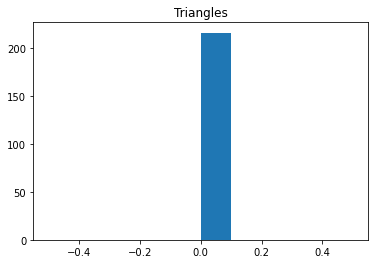

In [163]:
print(nx.triangles(G,0))
#print(nx.triangles(er))
h,bins, patches = plt.hist(list(nx.triangles(G).values()))
plt.title('Triangles')

In [164]:
print(nx.diameter(G))

10


In [165]:
print(nx.average_shortest_path_length(G))

5.29900947459087


In [52]:
import numpy as np
num_mol_1 = 240
num_mol_2 = 130
init_AM = np.zeros((num_mol_1 + num_mol_2,num_mol_1 + num_mol_2))
with open('Input-test3.input.crown_new.xyz.cs.xyz.GraphGeod') as init_graph_file:
# loop through CN output file and find edges, put into AM
    for line in init_graph_file:
        mol_1 = int(line.split()[0])
        mol_2 = int(line.split()[1])
        if mol_1 >= num_mol_1 and mol_2 >= num_mol_2:
            pass
        else:
            init_AM[mol_1 - 1][mol_2 - 1] = 1
            init_AM[mol_2 - 1][mol_1 - 1] = 1
# convert adjacency matrix to networkx formation
init_NX_AM = nx.from_numpy_matrix(init_AM)
G = init_NX_AM
#G = nx.number_connected_components(G)
#G = nx.from_numpy_matrix(init_NX_AM)#, create_using=nx.MultiGraph)
init_AM[1][25]

0.0

In [ ]:
# 3d graph plotting using mayavi 

import networkx as nx
import numpy as np
from mayavi import mlab

# some graphs to try
# H=nx.krackhardt_kite_graph()
# H=nx.Graph();H.add_edge('a','b');H.add_edge('a','c');H.add_edge('a','d')
# H=nx.grid_2d_graph(4,5)
#H = nx.cycle_graph(20)

# reorder nodes from 0,len(G)-1
#G = nx.convert_node_labels_to_integers(H)
# 3d spring layout
pos = nx.spring_layout(G, dim=3)
# numpy array of x,y,z positions in sorted node order
xyz = np.array([pos[v] for v in sorted(G)])
# scalar colors
scalars = np.array(list(G.nodes())) + 5

pts = mlab.points3d(
    xyz[:, 0],
    xyz[:, 1],
    xyz[:, 2],
    scalars,
    scale_factor=0.1,
    scale_mode="none",
    colormap="Blues",
    resolution=20,
)

pts.mlab_source.dataset.lines = np.array(list(G.edges()))
tube = mlab.pipeline.tube(pts, tube_radius=0.01)
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))
mlab.show()

#communitiy detection

In [5]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[[0,
  1,
  3,
  4,
  6,
  7,
  9,
  11,
  12,
  13,
  16,
  17,
  18,
  19,
  21,
  22,
  23,
  24,
  25,
  27,
  28,
  30,
  31,
  33,
  34,
  35,
  38,
  39,
  40,
  42,
  43,
  44,
  45,
  49,
  50,
  52,
  53,
  54,
  56,
  58,
  59,
  60,
  61,
  62,
  63,
  66,
  67,
  69,
  70,
  73,
  75,
  76,
  77,
  78,
  80,
  81,
  83,
  84,
  86,
  89,
  90,
  91,
  94,
  95,
  96,
  97,
  101,
  102,
  103,
  105,
  108,
  111,
  114,
  116,
  117,
  118,
  119,
  121,
  122,
  123,
  124,
  127,
  128,
  129,
  130,
  132,
  133,
  135,
  137,
  138,
  139,
  141,
  142,
  143,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  156,
  157,
  159,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  169,
  171,
  173,
  174,
  175,
  176,
  179,
  181,
  183,
  186,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  199,
  200,
  201,
  204,
  205,
  206,
  207,
  209,
  210,
  211,
  212,
  213,
  215],
 [2,
  5,
  8,
  10,
  14,
  15,
  20,
  26

In [12]:
print(len(top_level_communities[0]))
print(len(top_level_communities[1]))
print(top_level_communities[0])

157
59
{0, 1, 3, 4, 6, 7, 9, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 30, 31, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 66, 67, 69, 70, 73, 74, 75, 76, 77, 78, 80, 81, 83, 84, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 99, 101, 102, 103, 105, 106, 108, 109, 111, 114, 116, 117, 118, 119, 121, 122, 123, 124, 126, 127, 128, 129, 130, 132, 133, 135, 137, 138, 139, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 159, 161, 162, 163, 164, 165, 166, 167, 169, 171, 173, 174, 175, 176, 178, 179, 181, 183, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215}


In [26]:
largest_comm = np.array(top_level_communities[0])
print(largest_comm)

{0, 1, 3, 4, 6, 7, 9, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 30, 31, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 66, 67, 69, 70, 73, 74, 75, 76, 77, 78, 80, 81, 83, 84, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 99, 101, 102, 103, 105, 106, 108, 109, 111, 114, 116, 117, 118, 119, 121, 122, 123, 124, 126, 127, 128, 129, 130, 132, 133, 135, 137, 138, 139, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 159, 161, 162, 163, 164, 165, 166, 167, 169, 171, 173, 174, 175, 176, 178, 179, 181, 183, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 204, 205, 206, 207, 209, 210, 211, 212, 213, 215}


# Network within Communities. 

In [29]:
#n >= 600
#degree_sequence = sorted((d for n, d in G.degree() if n > 600 ), reverse=True)
degree_sequence = sorted((d for n, d in G.degree() if n in largest_comm ), reverse=True)

#dmax = max(degree_sequence)
#Gcc = sorted((G.subgraph(c) for c in nx.connected_components(G)))[0]
#print(Gcc)
#pos = nx.spring_layout(Gcc)
#nx.draw_networkx_nodes(Gcc, pos, node_size=20)
#nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
#plt.show()
print((degree_sequence))

[]
